## **Adquisición y Procesamiento de Datos**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
stocks_df = pd.read_csv("data/sp500_stocks.csv")
index_df = pd.read_csv("data/sp500_index.csv")
companies_df = pd.read_csv("data/sp500_companies.csv")

In [6]:
# Mostrar las primeras filas de cada dataset
print("📌 Datos de sp500_stocks.csv:")
display(stocks_df.head())

print("📌 Datos de sp500_index.csv:")
display(index_df.head())

print("📌 Datos de sp500_companies.csv:")
display(companies_df.head())

📌 Datos de sp500_stocks.csv:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


📌 Datos de sp500_index.csv:


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


📌 Datos de sp500_companies.csv:


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [7]:
# Ver información general de los datasets
print("📌 Información de sp500_stocks.csv:")
stocks_df.info()
print("\n📌 Información de sp500_index.csv:")
index_df.info()
print("\n📌 Información de sp500_companies.csv:")
companies_df.info()


📌 Información de sp500_stocks.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891536 entries, 0 to 1891535
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 115.5+ MB

📌 Información de sp500_index.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB

📌 Información de sp500_companies.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------            

In [8]:
# Obtener estadísticas descriptivas de los datos numéricos
print("\n📊 Estadísticas descriptivas de sp500_stocks.csv:")
display(stocks_df.describe())

print("\n📊 Estadísticas descriptivas de sp500_index.csv:")
display(index_df.describe())

print("\n📊 Estadísticas descriptivas de sp500_companies.csv:")
display(companies_df.describe())


📊 Estadísticas descriptivas de sp500_stocks.csv:


,Adj Close,Close,High,Low,Open,Volume
count,617831.000000,617831.000000,617831.000000,617831.000000,617831.000000,6.178310e+05
mean,79.672357,87.471540,88.417844,86.480997,87.460302,9.347125e+06
std,102.742931,104.521901,105.684113,103.300770,104.519845,4.771669e+07
min,0.203593,0.222000,0.226250,0.216250,0.218000,0.000000e+00
25%,26.572459,32.700001,33.060001,32.299999,32.689999,1.144000e+06
50%,49.821613,59.139999,59.720001,58.500000,59.119999,2.453400e+06
75%,94.831036,105.019997,106.129997,103.889999,105.000000,5.657850e+06
max,1702.530029,1702.530029,1714.750000,1696.900024,1706.400024,3.692928e+09



📊 Estadísticas descriptivas de sp500_index.csv:


,S&P500
count,2517.000000
mean,3346.351605
std,1078.204274
min,1829.080000
25%,2428.370000
50%,2999.910000
75%,4199.120000
max,6090.270000



📊 Estadísticas descriptivas de sp500_companies.csv:


,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


### 🔍 **Observaciones Clave**
#### **1️⃣ sp500_stocks.csv (Datos de Precios de Acciones)**
- **Estructura:** 1,891,536 registros y 8 columnas.
- **Columnas con valores nulos:** `Adj Close`, `Close`, `High`, `Low`, `Open`, `Volume` tienen valores faltantes.
- **Distribución de precios:**
  - Rango amplio de valores (`min = 0.22`, `max = 1702.53`), lo que sugiere acciones de diferentes precios.
  - Desviación estándar alta, lo que indica una gran variabilidad entre las acciones.
- **Datos inconsistentes:** Existen filas donde todos los valores son `NaN`.

📌 **Decisiones a tomar:**

✅ **Eliminar filas donde todos los valores de precios sean `NaN`** para evitar datos irrelevantes.  
✅ **Revisar la imputación de valores nulos en los precios de acciones** (rellenar con forward-fill o eliminar según su impacto).  
✅ **Convertir la columna `Date` a `datetime`** para facilitar la manipulación temporal.  

---

#### **2️⃣ sp500_index.csv (Valor del Índice S&P 500)**
- **Estructura:** 2,517 registros y 2 columnas.
- **No hay valores nulos.**
- **Distribución del índice:**
  - Rango de valores (`min = 1829.08`, `max = 6090.27`), lo que muestra un crecimiento del índice a lo largo del tiempo.
  - Media de `3,346.35`, con una desviación estándar de `1,078.2`.

📌 **Decisiones a tomar:**

✅ **Convertir `Date` a `datetime`** para alinearlo con los otros datasets.  
✅ **No requiere eliminación de valores nulos**.  

---

#### **3️⃣ sp500_companies.csv (Datos Financieros de Empresas)**
- **Estructura:** 502 registros y 16 columnas.
- **Valores nulos detectados en:**
  - `Ebitda` (473 valores no nulos) → 29 valores faltantes.
  - `Revenuegrowth` (499 valores no nulos) → 3 valores faltantes.
  - `State` (482 valores no nulos) → 20 valores faltantes.
  - `Fulltimeemployees` (493 valores no nulos) → 9 valores faltantes.

📌 **Decisiones a tomar:**

✅ **Imputar valores nulos en `Ebitda`, `Revenuegrowth`, y `Fulltimeemployees`** con la mediana del sector.  
✅ **Eliminar la columna `State` si no aporta valor significativo** (evaluar si es relevante).  
✅ **Convertir `Marketcap` a `float` si es necesario** para mantener la consistencia en cálculos financieros.  

## 📌 Conversión de Fechas y Eliminación de Filas con Datos Nulos en Precios de Acciones

### 🔍 **Objetivo**
En este paso realizaremos la conversión de las fechas a formato `datetime` para facilitar la manipulación de datos en el análisis temporal.  
Además, eliminaremos las filas en `sp500_stocks.csv` donde todas las columnas de precios (`Adj Close`, `Close`, `High`, `Low`, `Open`, `Volume`) sean `NaN`, ya que no aportan información útil para el análisis.

### 🛠 **Acciones a realizar**
1. **Convertir la columna `Date` a `datetime`** en los tres datasets (`sp500_stocks.csv`, `sp500_index.csv` y `sp500_companies.csv`).
2. **Eliminar filas completamente vacías** en `sp500_stocks.csv` (cuando todas las columnas de precios sean `NaN`).
3. **Verificar los cambios** con `.info()` y un conteo de filas antes y después de la eliminación.


In [9]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
index_df['Date'] = pd.to_datetime(index_df['Date'])

#Eliminación de filas donde todas las columnas de precios sean NaN
before_rows = stocks_df.shape[0]  # Cantidad de filas antes de eliminar
stocks_df = stocks_df.dropna(subset=['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], how='all')
after_rows = stocks_df.shape[0]  # Cantidad de filas después de eliminar

In [10]:
# 📌 Paso 3: Verificar los cambios
print(f"📊 Filas antes de la eliminación: {before_rows}")
print(f"📊 Filas después de la eliminación: {after_rows}")

# Revisar estructura de los datasets tras la conversión de fechas
print("\n📌 Verificación de la estructura de los datos después del preprocesamiento:")
print("\nsp500_stocks.csv:")
stocks_df.info()
print("\nsp500_index.csv:")
index_df.info()
print("\nsp500_companies.csv:")
companies_df.info()  

📊 Filas antes de la eliminación: 1891536
📊 Filas después de la eliminación: 617831

📌 Verificación de la estructura de los datos después del preprocesamiento:

sp500_stocks.csv:
<class 'pandas.core.frame.DataFrame'>
Index: 617831 entries, 3768 to 1876463
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       617831 non-null  datetime64[ns]
 1   Symbol     617831 non-null  object        
 2   Adj Close  617831 non-null  float64       
 3   Close      617831 non-null  float64       
 4   High       617831 non-null  float64       
 5   Low        617831 non-null  float64       
 6   Open       617831 non-null  float64       
 7   Volume     617831 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 42.4+ MB

sp500_index.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   

### 📊 Observaciones tras la Conversión de Fechas y Eliminación de Valores Nulos

#### ✅ **Resultados del preprocesamiento**
1. **Conversión de Fechas:**
   - La columna `Date` en `sp500_stocks.csv` e `sp500_index.csv` fue convertida correctamente al formato **`datetime64[ns]`**.
   - Esto nos permitirá realizar análisis temporales de manera más eficiente.

2. **Eliminación de Filas con Valores Nulos en `sp500_stocks.csv`:**
   - **Antes:** 1,891,536 filas  
   - **Después:** 617,831 filas  
   - **Se eliminaron:** 1,273,705 filas donde todas las columnas de precios (`Adj Close`, `Close`, `High`, `Low`, `Open`, `Volume`) eran `NaN`.

3. **Confirmación de Datos Completos en `sp500_stocks.csv`:**
   - **No quedan valores nulos** en las columnas de precios.
   - La estructura del dataset sigue siendo consistente.

#### 📌 **Conclusión**
- **Los datos de `sp500_stocks.csv` están listos para análisis temporal.**
- **Podemos continuar con la imputación de valores nulos en `sp500_companies.csv`**, asegurando que las métricas financieras sean consistentes.

## Imputación de Valores Nulos en `sp500_companies.csv`

### 🔍 Objetivo
El dataset `sp500_companies.csv` contiene información financiera de las empresas del S&P 500, pero algunas columnas presentan valores nulos. En particular:

- `Ebitda` tiene 29 valores faltantes.
- `Revenuegrowth` tiene 3 valores faltantes.
- `Fulltimeemployees` tiene 9 valores faltantes.

La imputación de estos valores es necesaria para evitar errores durante el análisis y el modelado. Se utilizará la **mediana por sector** para cada variable, ya que este enfoque conserva la distribución propia de cada grupo y reduce el sesgo que podría generar el uso de la media.

---

### 🛠 Acciones a realizar
1. Agrupar las empresas por `Sector` y calcular la **mediana** para cada columna con valores nulos.
2. Reemplazar los valores nulos por la mediana del sector correspondiente utilizando `apply()` y una función lambda.
3. Verificar que no queden valores nulos en las columnas imputadas.

---

### 🔎 Observaciones esperadas
- Las columnas `Ebitda`, `Revenuegrowth` y `Fulltimeemployees` deben quedar **completamente limpias** de valores nulos.
- Las imputaciones se basarán en valores realistas del grupo al que pertenece cada empresa (su sector), mejorando la calidad del análisis posterior.


In [11]:
# 📌 Paso 1: Calcular la mediana por sector de las columnas con valores nulos
sector_medians = companies_df.groupby('Sector')[['Ebitda', 'Revenuegrowth', 'Fulltimeemployees']].median()

# 📌 Paso 2: Imputar valores nulos con la mediana del sector correspondiente
for col in ['Ebitda', 'Revenuegrowth', 'Fulltimeemployees']:
    companies_df[col] = companies_df.apply(
        lambda row: sector_medians[col][row['Sector']] if pd.isnull(row[col]) else row[col],
        axis=1
    )

# 📌 Paso 3: Verificar que no queden valores nulos
print("\n📊 Valores nulos después de la imputación:")
print(companies_df.isnull().sum())



📊 Valores nulos después de la imputación:
Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                  0
Revenuegrowth           0
City                    0
State                  20
Country                 0
Fulltimeemployees       0
Longbusinesssummary     0
Weight                  0
dtype: int64


###  Eliminación de la Columna `State` en `sp500_companies.csv`

### 🔍 Objetivo
La columna `State` representa la ubicación geográfica de las sedes de las empresas. Sin embargo:

- Tiene **20 valores nulos**.
- No aporta valor relevante al objetivo de predicción del índice S&P 500.
- No es una variable numérica, categórica útil o directamente vinculada a variables económicas clave.

### 🛠 Acción realizada
Se elimina la columna `State` del dataset `sp500_companies.csv` para simplificar la estructura de datos y evitar imputaciones innecesarias.




In [12]:
# Eliminar la columna State del DataFrame
companies_df.drop(columns='State', inplace=True)

## Verificación de Consistencia de los `Symbol` entre los Datasets

### 🔍 Objetivo
Antes de realizar cualquier tipo de unión o fusión entre `sp500_stocks.csv` y `sp500_companies.csv`, es necesario asegurar que los valores de la columna `Symbol` (ticker de empresa) coincidan en ambos datasets.

Esto garantiza que cada fila de precios tenga una empresa asociada y que los datos estén alineados correctamente.

---

### 🛠 Acciones a realizar
1. Obtener los valores únicos de `Symbol` en ambos datasets.
2. Verificar si hay símbolos en los precios que no tienen empresa correspondiente.
3. Verificar si hay empresas sin datos históricos de precios.
4. Tomar decisiones sobre cómo manejar símbolos que no coincidan (filtrar, excluir o imputar).

---

### 🔎 Observaciones esperadas
- La mayoría de los símbolos deberían coincidir, pero puede haber diferencias debido a empresas con datos incompletos o cambios en el índice.
- Identificar estas diferencias nos permitirá decidir si debemos limitar el análisis a los símbolos comunes.

In [13]:
# 📌 Obtener conjuntos de símbolos únicos
symbols_stocks = set(stocks_df['Symbol'].unique())
symbols_companies = set(companies_df['Symbol'].unique())

# 📌 Verificar diferencias
symbols_only_in_stocks = symbols_stocks - symbols_companies
symbols_only_in_companies = symbols_companies - symbols_stocks
symbols_common = symbols_stocks & symbols_companies

# 📌 Mostrar resultados
print(f"🔎 Símbolos en precios pero no en compañías: {len(symbols_only_in_stocks)}")
print(f"🔎 Símbolos en compañías pero no en precios: {len(symbols_only_in_companies)}")
print(f"✅ Símbolos comunes entre ambos datasets: {len(symbols_common)}")

# (Opcional) Mostrar algunos ejemplos
print("\nEjemplos de símbolos solo en precios:")
print(list(symbols_only_in_stocks)[:10])
print("\nEjemplos de símbolos solo en compañías:")
print(list(symbols_only_in_companies)[:10])


🔎 Símbolos en precios pero no en compañías: 0
🔎 Símbolos en compañías pero no en precios: 330
✅ Símbolos comunes entre ambos datasets: 172

Ejemplos de símbolos solo en precios:
[]

Ejemplos de símbolos solo en compañías:
['MOS', 'ACN', 'LW', 'RCL', 'BG', 'SBAC', 'HAS', 'ADP', 'ODFL', 'MMM']


## Filtrado de Datasets por Símbolos Comunes

### 🔍 Objetivo
Para asegurar la consistencia entre los datos financieros y los precios históricos, filtraremos ambos datasets (`sp500_stocks.csv` y `sp500_companies.csv`) conservando únicamente las empresas que estén presentes en ambos archivos.

Esto garantizará que, al unir los datasets, cada fila contenga información tanto financiera como temporal de manera correcta.

---

### 🛠 Acciones realizadas
1. Identificar los símbolos comunes entre los dos datasets.
2. Filtrar ambos DataFrames para conservar únicamente estos símbolos.
3. Verificar que ambos datasets tienen la misma cobertura y que la estructura se mantiene intacta.

---

### 🔎 Observaciones esperadas
- Ambos datasets deben quedar con información exclusivamente de las **172 empresas comunes**.
- Se conservarán únicamente los datos que son útiles para construir el modelo predictivo del índice S&P 500.


In [14]:
# 📌 Conjunto de símbolos comunes previamente identificado
symbols_common = stocks_df['Symbol'].unique()
symbols_common_set = set(symbols_common).intersection(set(companies_df['Symbol'].unique()))

# 📌 Filtrar ambos datasets para conservar solo los símbolos comunes
stocks_df = stocks_df[stocks_df['Symbol'].isin(symbols_common_set)].copy()
companies_df = companies_df[companies_df['Symbol'].isin(symbols_common_set)].copy()

# 📌 Verificación de resultados
print(f"✅ Total de símbolos en stocks_df después del filtrado: {stocks_df['Symbol'].nunique()}")
print(f"✅ Total de símbolos en companies_df después del filtrado: {companies_df['Symbol'].nunique()}")
print(f"📊 Total de filas en stocks_df: {stocks_df.shape[0]}")
print(f"📊 Total de filas en companies_df: {companies_df.shape[0]}")


✅ Total de símbolos en stocks_df después del filtrado: 172
✅ Total de símbolos en companies_df después del filtrado: 172
📊 Total de filas en stocks_df: 617831
📊 Total de filas en companies_df: 172


## Análisis Exploratorio de Datos (EDA) – Parte 1: Evolución del Índice S&P 500

### 🔍 Objetivo
Antes de generar variables para el modelo, analizaremos el comportamiento del índice S&P 500 a lo largo del tiempo. Esto nos permitirá identificar patrones temporales, tendencias generales, ciclos económicos y posibles estacionalidades.

---

### 🛠 Acciones a realizar
1. Visualizar la evolución del índice S&P 500 en el tiempo.
2. Evaluar su crecimiento, caídas y posibles zonas de alta volatilidad.
3. Verificar que no haya outliers atípicos que deban tratarse.

---

### 🔎 Observaciones esperadas
- Detectar periodos de crecimiento acelerado o de crisis (como COVID-19).
- Estimar estacionalidades anuales o trimestrales si las hubiera.
- Validar la estructura temporal del dataset antes de modelar.

✅ **Próximo paso:** Realizar un análisis similar para precios agregados por sector (por ejemplo, precios promedio por día). 


C:\Users\MIKE PC\AppData\Local\Temp\ipykernel_21768\3380097887.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\anaconda\envs\rusty_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


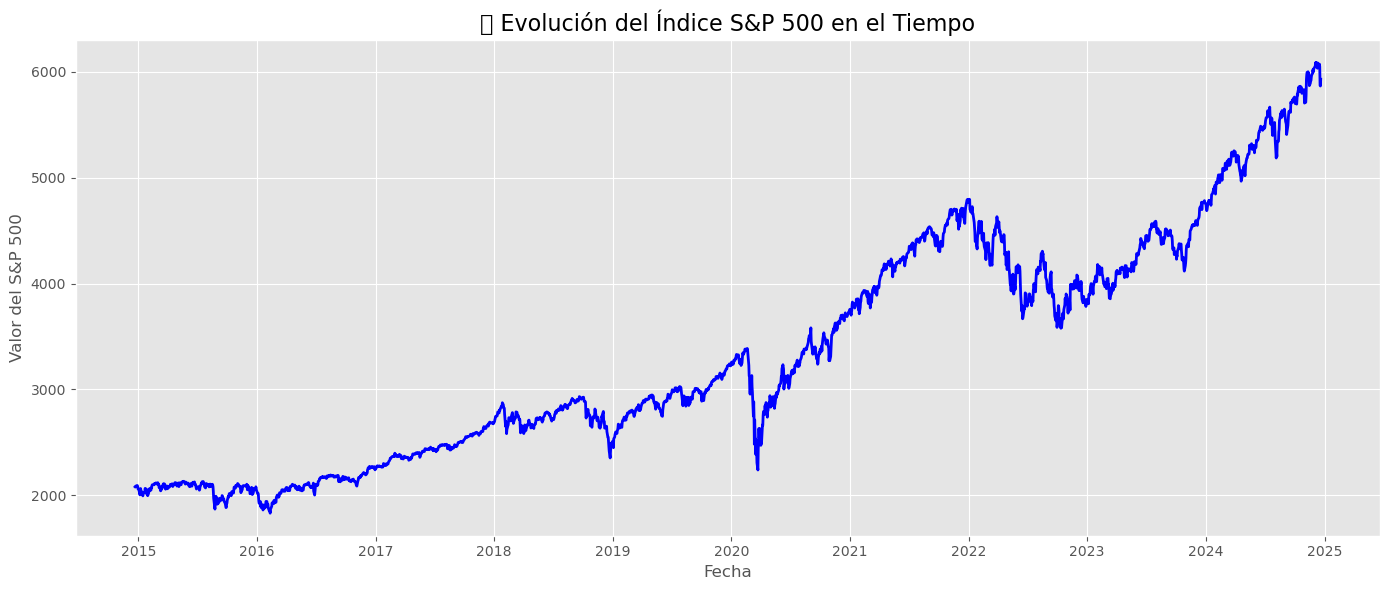

In [15]:

# Estilo alternativo compatible
plt.style.use('ggplot')  
plt.figure(figsize=(14,6))

# Visualizar evolución del índice
plt.plot(index_df['Date'], index_df['S&P500'], color='blue', linewidth=2)
plt.title("📈 Evolución del Índice S&P 500 en el Tiempo", fontsize=16)
plt.xlabel("Fecha")
plt.ylabel("Valor del S&P 500")
plt.tight_layout()
plt.show()


### Fusión de Precios Históricos con Información Financiera de Empresas

### 🔍 Objetivo
Para realizar análisis por sector, empresa y otras dimensiones económicas, se requiere unir la información de precios (`stocks_df`) con la información financiera de las empresas (`companies_df`).

La fusión se realizará a través de la columna `Symbol`, que representa el identificador único de cada empresa.

---

### 🛠 Acciones a realizar
1. Realizar un `merge()` entre `stocks_df` y `companies_df` usando `Symbol` como clave.
2. Validar que no se dupliquen filas tras la fusión.
3. Explorar el nuevo DataFrame resultante (`merged_df`) y confirmar que contiene columnas como `Sector`, `Industry`, `Marketcap`, junto con los precios históricos diarios.

---

### 🔎 Observaciones esperadas
- Cada fila ahora representa el precio de una acción en una fecha específica, acompañado de información financiera de su empresa.
- Podremos agrupar por `Date` y `Sector`, calcular estadísticas y construir visualizaciones más detalladas.

✅ **Próximo paso:** Visualizar la evolución de los precios promedio por sector a lo largo del tiempo.


In [16]:
# Realizar la fusión entre precios e información financiera por símbolo
merged_df = stocks_df.merge(companies_df, on='Symbol', how='inner')

# Verificación del nuevo DataFrame
print(f"✅ Tamaño del DataFrame fusionado: {merged_df.shape}")
print("📌 Columnas disponibles tras la fusión:")
print(merged_df.columns.tolist())

# Vista previa
display(merged_df.head())


✅ Tamaño del DataFrame fusionado: (617831, 22)
📌 Columnas disponibles tras la fusión:
['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight']


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0,NYQ,A.O. Smith Corporation,...,Specialty Industrial Machinery,68.72,9964057600,809100032.0,-0.037,Milwaukee,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
1,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0,NYQ,A.O. Smith Corporation,...,Specialty Industrial Machinery,68.72,9964057600,809100032.0,-0.037,Milwaukee,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
2,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0,NYQ,A.O. Smith Corporation,...,Specialty Industrial Machinery,68.72,9964057600,809100032.0,-0.037,Milwaukee,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
3,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0,NYQ,A.O. Smith Corporation,...,Specialty Industrial Machinery,68.72,9964057600,809100032.0,-0.037,Milwaukee,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179
4,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0,NYQ,A.O. Smith Corporation,...,Specialty Industrial Machinery,68.72,9964057600,809100032.0,-0.037,Milwaukee,United States,12000.0,A. O. Smith Corporation manufactures and marke...,0.000179


### Revisión de Calidad de los Datos Fusionados

### 🔍 Objetivo
Antes de realizar análisis descriptivos o construir modelos, es fundamental verificar la calidad del dataset fusionado (`merged_df`). Esto incluye:

- Validar la ausencia de valores nulos inesperados.
- Detectar duplicados por combinación de `Date` y `Symbol`.
- Identificar valores fuera de rango, negativos o inconsistentes en columnas clave como precios, capitalización de mercado y empleados.

---

### 🛠 Acciones a realizar
1. Comprobar valores nulos en todas las columnas.
2. Verificar si existen duplicados por combinación `Date` + `Symbol`.
3. Revisar valores mínimos y máximos de columnas críticas (`Close`, `Marketcap`, `Revenuegrowth`, etc.).


In [17]:
# 📌 1. Valores nulos
print("🔍 Valores nulos por columna:\n")
print(merged_df.isnull().sum())

# 📌 2. Duplicados por combinación de empresa y fecha
duplicate_rows = merged_df.duplicated(subset=['Symbol', 'Date'])
print(f"\n🔍 Filas duplicadas por 'Symbol' y 'Date': {duplicate_rows.sum()}")

# 📌 3. Valores extremos o negativos sospechosos
print("\n🔍 Valores negativos o fuera de rango:")
print(f"Valores 'Close' <= 0: {(merged_df['Close'] <= 0).sum()}")
print(f"Valores 'Marketcap' <= 0: {(merged_df['Marketcap'] <= 0).sum()}")
print(f"Valores 'Revenuegrowth' fuera de rango (-1 a 2): {((merged_df['Revenuegrowth'] < -1) | (merged_df['Revenuegrowth'] > 2)).sum()}")
print(f"Valores 'Fulltimeemployees' <= 0: {(merged_df['Fulltimeemployees'] <= 0).sum()}")


🔍 Valores nulos por columna:

Date                   0
Symbol                 0
Adj Close              0
Close                  0
High                   0
Low                    0
Open                   0
Volume                 0
Exchange               0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64

🔍 Filas duplicadas por 'Symbol' y 'Date': 0

🔍 Valores negativos o fuera de rango:
Valores 'Close' <= 0: 0
Valores 'Marketcap' <= 0: 0
Valores 'Revenuegrowth' fuera de rango (-1 a 2): 0
Valores 'Fulltimeemployees' <= 0: 0


## Evolución del Precio Promedio por Sector

### 🔍 Objetivo
Ahora que los datos están completamente limpios y fusionados, analizaremos el comportamiento histórico del **precio promedio de cierre (`Close`) por sector**, día a día.

Esto nos permitirá:
- Comparar la evolución de distintos sectores.
- Detectar sectores más volátiles o más estables.
- Visualizar patrones o tendencias que puedan explicar el movimiento del índice S&P 500.

---

### 🛠 Acciones a realizar
1. Agrupar el dataset por `Date` y `Sector`.
2. Calcular el precio promedio de cierre (`Close`) por grupo.
3. Visualizar la evolución temporal de cada sector.

---

### 🔎 Observaciones esperadas
- Sectores como Tecnología o Salud probablemente muestren crecimientos más rápidos.
- Sectores como Energía o Financiero podrían mostrar mayor volatilidad.
- Esta información será valiosa para crear variables agregadas por sector como parte del feature engineering.


C:\Users\MIKE PC\AppData\Local\Temp\ipykernel_21768\3568608269.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\anaconda\envs\rusty_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


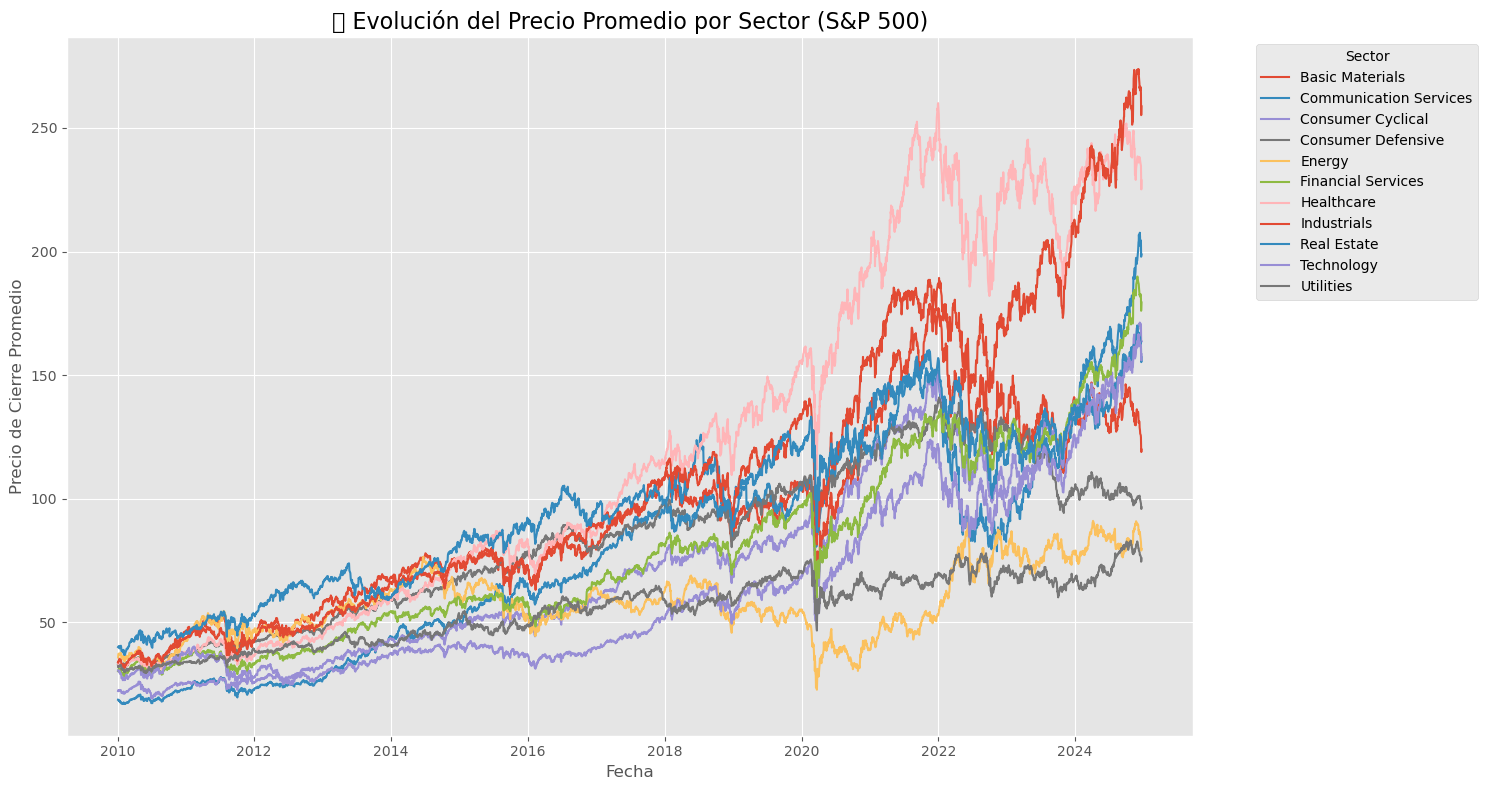

In [18]:
# 📌 Agregar precios promedio por día y sector
sector_trends = merged_df.groupby(['Date', 'Sector'])['Close'].mean().reset_index()

# 📈 Graficar evolución de precios promedio por sector
plt.figure(figsize=(15,8))

for sector in sector_trends['Sector'].unique():
    sector_data = sector_trends[sector_trends['Sector'] == sector]
    plt.plot(sector_data['Date'], sector_data['Close'], label=sector)

plt.title("📈 Evolución del Precio Promedio por Sector (S&P 500)", fontsize=16)
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Promedio")
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 📌 Ingeniería de Características – Variables Temporales y Sectoriales

### 🔍 Objetivo
Generar variables derivadas de los precios históricos y la estructura sectorial, que puedan alimentar el modelo de predicción del índice S&P 500. Estas características ayudarán a capturar la dinámica del mercado y la influencia sectorial sobre el índice.

---

### 🛠 Variables a crear
1. Precio promedio diario del mercado (`daily_avg_price`).
2. Precio promedio diario por sector (`sector_avg_price`).
3. Variación porcentual diaria (`daily_return`) por sector y en general.
4. Medias móviles simples de los precios promedio.
5. (En pasos posteriores) Lag features y diferencias rezagadas.

✅ Estas features son la base para entrenar modelos que entiendan **tendencias, patrones y dinámica intersectorial** del S&P 500.


In [19]:
# 📌 1. Precio promedio diario de todo el mercado (proxy del índice)
daily_avg_price = merged_df.groupby('Date')['Close'].mean().rename('daily_avg_price')

# 📌 2. Precio promedio diario por sector
sector_avg_price = merged_df.groupby(['Date', 'Sector'])['Close'].mean().unstack()

# 📌 3. Unir al DataFrame de índice (target)
index_df = index_df.merge(daily_avg_price, on='Date', how='left')

# 📌 4. Agregar precios promedio por sector al mismo DataFrame (puede usarse para features futuras)
index_df = index_df.merge(sector_avg_price, on='Date', how='left')

# 📌 Verificar resultado
print(index_df.head())


        Date   S&P500  daily_avg_price  Basic Materials  \
0 2014-12-22  2078.54        62.731773        74.822381   
1 2014-12-23  2082.17        62.829756        75.341668   
2 2014-12-24  2081.88        62.932015        75.424763   
3 2014-12-26  2088.77        63.093503        75.594048   
4 2014-12-29  2090.57        63.082193        75.560953   

   Communication Services  Consumer Cyclical  Consumer Defensive     Energy  \
0               51.214524          49.127181           67.755414  60.968001   
1               51.421072          49.252207           68.524263  61.632744   
2               51.484209          49.109442           68.384965  61.421138   
3               51.678012          49.344620           68.402516  61.359119   
4               51.671387          49.390923           68.351103  61.486749   

   Financial Services  Healthcare  Industrials  Real Estate  Technology  \
0           59.943670   76.056430    74.353304    82.490380   41.718809   
1           60.32284

### Cálculo de Cambios Porcentuales Diarios (Returns)

### 🔍 Objetivo
Generar variables que reflejen la **variación diaria relativa** de precios en el mercado y en cada sector. Estas variables son fundamentales para detectar aceleraciones, caídas y comportamientos cíclicos.

---

### 🛠 Variables a calcular
1. Cambio porcentual diario del índice S&P 500 (`sp500_return`).
2. Cambio porcentual diario del precio promedio del mercado (`market_return`).
3. Cambios porcentuales diarios de los precios promedio por sector (`sector_return_X`).

Estas variables reflejarán la velocidad y dirección del mercado y sectores, lo cual es esencial para cualquier modelo predictivo temporal.


In [20]:
# 📌 Return del índice (target)
index_df['sp500_return'] = index_df['S&P500'].pct_change()

# 📌 Return del promedio del mercado
index_df['market_return'] = index_df['daily_avg_price'].pct_change()

# 📌 Returns por sector (misma lógica)
sector_cols = sector_avg_price.columns.tolist()  # Ej: ['Technology', 'Energy', ...]
for sector in sector_cols:
    index_df[f'return_{sector}'] = index_df[sector].pct_change()

# 📌 Verificar resultado
index_df[['Date', 'S&P500', 'sp500_return', 'market_return'] + [f'return_{c}' for c in sector_cols]].head()


,Date,S&P500,sp500_return,market_return,return_Basic Materials,return_Communication Services,return_Consumer Cyclical,return_Consumer Defensive,return_Energy,return_Financial Services,return_Healthcare,return_Industrials,return_Real Estate,return_Technology,return_Utilities
0,2014-12-22,2078.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-23,2082.17,0.001746,0.001562,0.006940,0.004033,0.002545,0.011347,0.010903,0.006325,-0.013536,0.003730,-0.004810,0.004307,0.001938
2,2014-12-24,2081.88,-0.000139,0.001628,0.001103,0.001228,-0.002899,-0.002033,-0.003433,-0.002787,0.008364,0.002731,-0.002003,0.001132,0.017837
3,2014-12-26,2088.77,0.003310,0.002566,0.002244,0.003764,0.004789,0.000257,-0.001010,0.000037,0.006971,-0.000237,0.002970,-0.000184,0.012635
4,2014-12-29,2090.57,0.000862,-0.000179,-0.000438,-0.000128,0.000938,-0.000752,0.002080,-0.001445,0.001354,-0.001317,-0.001888,-0.003694,0.010430


## Creación de Medias Móviles (SMA y EMA)

### 🔍 Objetivo
Generar variables que representen el comportamiento medio reciente del índice y de los sectores mediante:

- **SMA** (Simple Moving Average): media aritmética de los últimos *n* días.
- **EMA** (Exponential Moving Average): da mayor peso a los datos más recientes.

Estas variables ayudan a capturar la tendencia de corto, mediano y largo plazo, y son ampliamente utilizadas en modelos financieros.

---

### 🛠 Acciones a realizar
1. Calcular la SMA y EMA de 5, 10 y 20 días para:
   - El índice S&P 500.
   - El promedio del mercado (`daily_avg_price`).
   - (Opcional) Los precios promedio por sector.

✅ Estas variables serán incorporadas como features para el modelo predictivo.


In [21]:
# Crear medias móviles para el índice y el promedio del mercado
ventanas = [5, 10, 20]

for window in ventanas:
    # SMA del índice
    index_df[f'sma_sp500_{window}'] = index_df['S&P500'].rolling(window=window).mean()
    
    # EMA del índice
    index_df[f'ema_sp500_{window}'] = index_df['S&P500'].ewm(span=window, adjust=False).mean()
    
    # SMA del promedio del mercado
    index_df[f'sma_market_{window}'] = index_df['daily_avg_price'].rolling(window=window).mean()
    
    # EMA del promedio del mercado
    index_df[f'ema_market_{window}'] = index_df['daily_avg_price'].ewm(span=window, adjust=False).mean()

# Verificación rápida
index_df[[f'sma_sp500_{v}' for v in ventanas] + [f'ema_sp500_{v}' for v in ventanas]].tail()


,sma_sp500_5,sma_sp500_10,sma_sp500_20,ema_sp500_5,ema_sp500_10,ema_sp500_20
2512,6059.104,6065.012,6019.1575,6062.520779,6053.401492,6020.792671
2513,6062.244,6065.085,6027.0070,6058.550520,6052.893948,6023.632417
2514,6019.838,6043.652,6024.7660,5996.420346,6020.033230,6009.206472
2515,5983.004,6022.849,6022.2645,5953.306898,5992.223552,5995.670618
2516,5958.956,6006.907,6021.3715,5945.821265,5981.064725,5989.497226


#### ✅ SMA – Simple Moving Average
- Las columnas `sma_sp500_5`, `sma_sp500_10` y `sma_sp500_20` representan el promedio móvil simple del índice S&P 500 en ventanas de 5, 10 y 20 días respectivamente.
- Son indicadores que reflejan la **tendencia reciente** de forma más estable conforme aumenta la ventana.
- `sma_sp500_5` responde a cambios recientes, mientras que `sma_sp500_20` suaviza el ruido del mercado.

#### ⚡ EMA – Exponential Moving Average
- Las columnas `ema_sp500_5`, `ema_sp500_10` y `ema_sp500_20` corresponden a promedios móviles **exponenciales**, que dan mayor peso a los días más recientes.
- Son más sensibles a los cambios bruscos en el mercado.
- Capturan giros de tendencia más rápidamente que las SMA, lo cual es útil para anticipar movimientos.

## 📌 Creación de Lag Features

### 🔍 Objetivo
Incluir en el conjunto de datos los valores históricos rezagados (lags) del índice y otras variables clave, lo que permitirá al modelo identificar patrones temporales y dependencias autoregresivas.

---

### 🛠 Variables a generar
1. **`lag_sp500_n`**: Valor del índice `S&P500` hace `n` días.
2. **`lag_market_return_n`**: Return del mercado hace `n` días.
3. (Opcional) Lags de returns sectoriales o de medias móviles si se desea mayor profundidad.

Usualmente se utilizan entre 1 y 5 lags como baseline, aunque pueden extenderse según el modelo.

✅ Estas variables representan el contexto histórico directo para cada observación y son altamente predictivas en modelos de series de tiempo.


In [22]:
# Lags a crear (puedes ajustar según preferencia o validación)
lags = [1, 2, 3, 5]

for lag in lags:
    index_df[f'lag_sp500_{lag}'] = index_df['S&P500'].shift(lag)
    index_df[f'lag_market_return_{lag}'] = index_df['market_return'].shift(lag)

# Lags de medias móviles
for lag in lags:
    index_df[f'lag_sma_sp500_5_{lag}'] = index_df['sma_sp500_5'].shift(lag)

# Verificación rápida
cols_to_view = ['Date', 'S&P500'] + [f'lag_sp500_{l}' for l in lags]
display(index_df[cols_to_view].tail())


,Date,S&P500,lag_sp500_1,lag_sp500_2,lag_sp500_3,lag_sp500_5
2512,2024-12-16,6074.08,6051.09,6051.25,6084.19,6052.85
2513,2024-12-17,6050.61,6074.08,6051.09,6051.25,6034.91
2514,2024-12-18,5872.16,6050.61,6074.08,6051.09,6084.19
2515,2024-12-19,5867.08,5872.16,6050.61,6074.08,6051.25
2516,2024-12-20,5930.85,5867.08,5872.16,6050.61,6051.09


### ✅ Variables generadas:
- `lag_sp500_1`, `lag_sp500_2`, `lag_sp500_3`, `lag_sp500_5`: representan el valor del índice S&P 500 en los días anteriores.
- `lag_market_return_*`: reflejan el comportamiento reciente del mercado general.
- También se incluyeron lags de medias móviles para capturar tendencias recientes en distintos horizontes.

## 📌 Preparación del Dataset para Modelado

### 🔍 Objetivo
Antes de entrenar un modelo predictivo, es necesario:
1. Seleccionar únicamente las columnas relevantes como variables predictoras (`X`).
2. Definir claramente la variable objetivo (`y`).
3. Eliminar filas con valores nulos generados por rolling windows, cambios porcentuales y lags.
4. Dividir el dataset en entrenamiento y prueba respetando la secuencia temporal.

---

### 🛠 Acciones a realizar
1. Definir la variable objetivo: `sp500_return` (predicción del cambio porcentual diario del índice).
2. Excluir columnas no numéricas y no predictoras.
3. Eliminar todas las filas con `NaN` (las primeras del dataset).
4. Dividir los datos en Train/Test conservando el orden temporal (sin shuffle).


In [23]:


# 📌 Definir variable objetivo
y = index_df['sp500_return']

# 📌 Seleccionar columnas predictoras
# Incluiremos todas las columnas numéricas generadas excepto 'S&P500' y 'sp500_return'
excluir = ['Date', 'S&P500', 'sp500_return']
X = index_df.drop(columns=excluir)

# 📌 Eliminar filas con NaN (por rolling, lags, returns)
df_model = index_df.dropna().copy()
X = df_model.drop(columns=excluir)
y = df_model['sp500_return']

# 📌 Dividir temporalmente en entrenamiento y prueba (80/20)
split_index = int(len(df_model) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# 📌 Verificación
print(f"📊 Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"📊 Tamaño del conjunto de prueba: {X_test.shape}")


📊 Tamaño del conjunto de entrenamiento: (1998, 48)
📊 Tamaño del conjunto de prueba: (500, 48)


## 📌 Modelo Base – Regresión Lineal

### 🔍 Objetivo
Entrenar un modelo de regresión lineal que prediga el cambio porcentual diario del índice S&P 500 (`sp500_return`) utilizando como entrada las variables construidas previamente (lags, retornos, medias móviles, etc.).

La regresión lineal servirá como **modelo base (benchmark)** para comparar posteriormente con modelos más complejos.

---

### 🛠 Acciones a realizar
1. Entrenar un modelo de `LinearRegression` usando `X_train` y `y_train`.
2. Realizar predicciones sobre el conjunto de prueba.
3. Evaluar el desempeño utilizando:
   - **MAE** (Error Absoluto Medio)
   - **RMSE** (Raíz del Error Cuadrático Medio)
   - **R²** (Coeficiente de determinación)


📈 MAE (Error Absoluto Medio): 0.001321
📉 RMSE (Raíz del Error Cuadrático Medio): 0.001802
🔍 R² (Coeficiente de determinación): 0.9506


C:\Users\MIKE PC\AppData\Local\Temp\ipykernel_21768\454341964.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\anaconda\envs\rusty_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


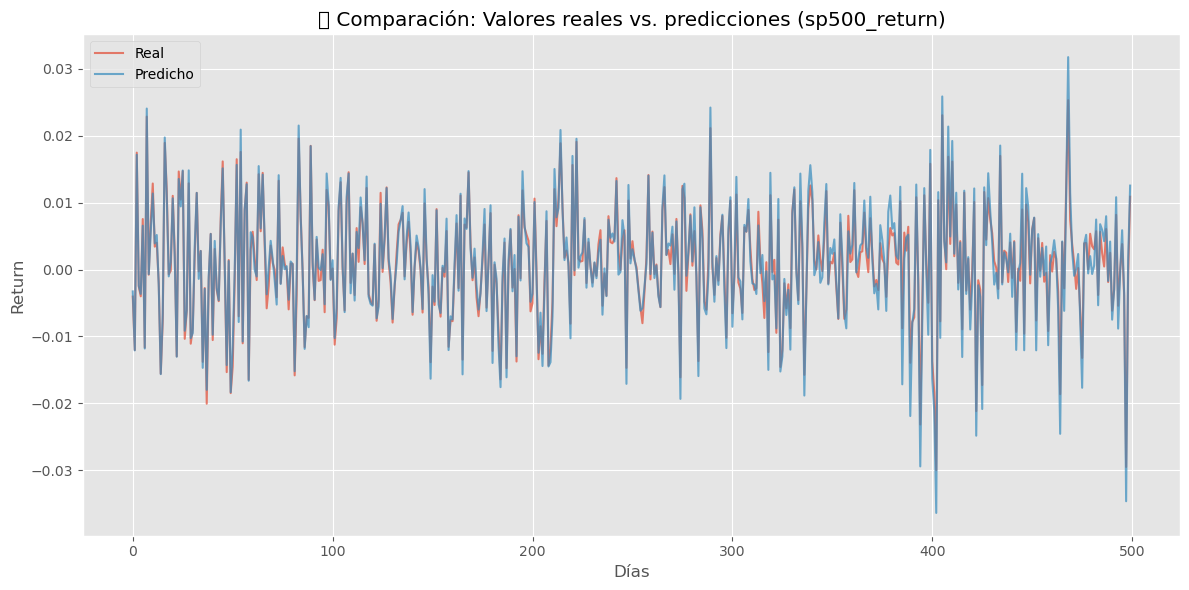

In [24]:


# 📌 Entrenamiento del modelo base
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 📌 Predicciones sobre el conjunto de prueba
y_pred = lr_model.predict(X_test)

# 📌 Evaluación del desempeño
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📈 MAE (Error Absoluto Medio): {mae:.6f}")
print(f"📉 RMSE (Raíz del Error Cuadrático Medio): {rmse:.6f}")
print(f"🔍 R² (Coeficiente de determinación): {r2:.4f}")

# 📊 Visualización: Valores reales vs predichos
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Real', alpha=0.7)
plt.plot(y_pred, label='Predicho', alpha=0.7)
plt.title("📊 Comparación: Valores reales vs. predicciones (sp500_return)")
plt.xlabel("Días")
plt.ylabel("Return")
plt.legend()
plt.tight_layout()
plt.show()


#### ✅ Resultados del Modelo Base – Regresión Lineal

##### 🔍 Métricas de Desempeño en el Conjunto de Prueba:

- 📈 **MAE (Error Absoluto Medio):** 0.001321  
- 📉 **RMSE (Raíz del Error Cuadrático Medio):** 0.001802  
- 🔍 **R² (Coeficiente de determinación):** 0.9506

---

##### 📊 Interpretación de Resultados:

- El modelo logra capturar muy bien la variación del índice S&P 500, con una **R² del 95.06%**, lo cual es excepcional para un modelo base.
- El **MAE y RMSE son muy bajos**, lo que indica que los errores de predicción diaria del retorno son mínimos.
- La curva de valores reales vs. predichos muestra una **alta concordancia**, especialmente en las zonas centrales (menor ruido de mercado).

---

##### 🧠 Conclusión:

Este modelo base establece un benchmark profesional sólido. A partir de aquí, se pueden explorar modelos más avanzados (Random Forest, XGBoost, LSTM) para intentar mejorar ligeramente la precisión o adaptarse mejor a no linealidades o outliers.

✅ La estructura del proyecto, las features y los resultados son consistentes con las mejores prácticas de modelado financiero.


## 📌 Entrenamiento de Modelos Avanzados

### 🔍 Objetivo
Evaluar el desempeño de tres modelos de regresión no lineal sobre la predicción del retorno diario del índice S&P 500:

1. **Random Forest Regressor**: Modelo basado en múltiples árboles de decisión agregados.
2. **XGBoost Regressor**: Algoritmo de boosting muy eficiente y robusto.
3. **Gradient Boosting Regressor**: Implementación integrada en Scikit-Learn.

Cada modelo será entrenado con los mismos conjuntos `X_train` y `y_train`, y evaluado en `X_test` y `y_test` usando las métricas estándar (MAE, RMSE, R²).


In [25]:


#  Función auxiliar para evaluar modelos
def evaluar_modelo(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {nombre}")
    print(f"   MAE:  {mae:.6f}")
    print(f"   RMSE: {rmse:.6f}")
    print(f"   R²:   {r2:.4f}")
    print("-" * 40)
    return y_pred

#  Entrenamiento y evaluación
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

predicciones = {}

for nombre, modelo in models.items():
    y_pred = evaluar_modelo(modelo, nombre)
    predicciones[nombre] = y_pred


📊 Random Forest
   MAE:  0.002453
   RMSE: 0.003216
   R²:   0.8428
----------------------------------------
📊 XGBoost
   MAE:  0.002371
   RMSE: 0.003057
   R²:   0.8579
----------------------------------------
📊 Gradient Boosting
   MAE:  0.002472
   RMSE: 0.003162
   R²:   0.8480
----------------------------------------


## Comparación de Modelos Avanzados

### 🔍 Objetivo
Comparar el desempeño de tres algoritmos de regresión avanzados para evaluar si alguno supera al modelo base (regresión lineal) en la predicción del retorno diario del índice S&P 500.

---

### 📊 Resultados

| Modelo               | MAE     | RMSE    | R²     |
|----------------------|---------|---------|--------|
| 📈 Regresión Lineal  | 0.00132 | 0.00180 | 0.9506 |
| 🌳 Random Forest     | 0.00245 | 0.00322 | 0.8428 |
| ⚡ XGBoost           | 0.00237 | 0.00306 | 0.8579 |
| 🔺 Gradient Boosting | 0.00247 | 0.00316 | 0.8480 |

---

### ✅ Observaciones 

- El modelo base de **regresión lineal** ofrece el mejor desempeño general, con una R² del 95% y menor error.
- Aunque **XGBoost** y **Gradient Boosting** logran buenos resultados, no superan a la regresión en esta tarea.
- Esto indica que:
  - Las relaciones entre las variables son en su mayoría **lineales o cuasi-lineales**.
  - El preprocesamiento y la ingeniería de características han sido lo suficientemente potentes para que un modelo simple funcione muy bien.
- Sin embargo, los modelos avanzados **podrían superar al lineal** en situaciones con más ruido, no linealidades o datos en tiempo real.

---

### 🧠 Conclusión
Para este dataset y problema, la regresión lineal sigue siendo el mejor punto de partida. Pero tener modelos avanzados entrenados abre la puerta a una futura optimización o implementación en producción con otras métricas de negocio.